# Unraveling the Secrets of Hair Loss 

Hair health is a reflection of internal biological processes and external environmental interactions.
This project endeavors to decode the complexities of hair health by analyzing a myriad of contributing factors, from genetics to lifestyle choices. My aim is to harness the power of data to predict whether someone is bald.

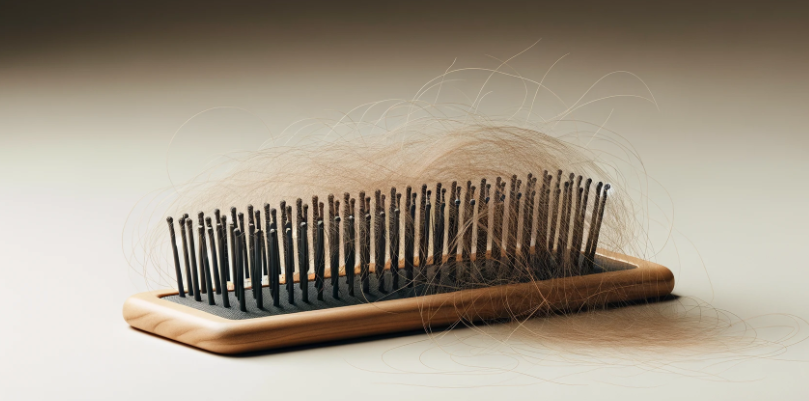

## Dataset Overview

The dataset for this project is sourced from Kaggle https://www.kaggle.com/datasets/amitvkulkarni/hair-health/data

It contains information about various factors that may contribute to baldness in individuals. Each row represents a unique individual, and the columns represent different factors related to genetics, hormonal changes, medical conditions, medications and treatments, nutritional deficiencies, stress levels, age, poor hair care habits, environmental factors, smoking habits, weight loss, and the presence or absence of baldness.

#### Columns:

- **Genetics:** Indicates whether the individual has a family history of baldness (Yes/No).
- **Hormonal Changes:** Indicates whether the individual has experienced hormonal changes (Yes/No).
- **Medical Conditions:** Lists specific medical conditions that may contribute to baldness, such as Alopecia Areata, Thyroid Problems, Scalp Infection, Psoriasis, Dermatitis, etc.
- **Medications & Treatments:** Lists medications and treatments that may lead to hair loss, such as Chemotherapy, Heart Medication, Antidepressants, Steroids, etc.
- **Nutritional Deficiencies:** Lists nutritional deficiencies that may contribute to hair loss, such as Iron deficiency, Vitamin D deficiency, Biotin deficiency, Omega-3 fatty acid deficiency, etc.
- **Stress:** Indicates the stress level of the individual (Low/Moderate/High).
- **Age:** Represents the age of the individual.
- **Poor Hair Care Habits:** Indicates whether the individual practices poor hair care habits (Yes/No).
- **Environmental Factors:** Indicates whether the individual is exposed to environmental factors that may contribute to hair loss (Yes/No).
- **Smoking:** Indicates whether the individual smokes (Yes/No).
- **Weight Loss:** Indicates whether the individual has experienced significant weight loss (Yes/No).
- **Baldness (Target):** Binary variable indicating the presence (1) or absence (0) of baldnessof baldness in the individual.

## Load libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import tensorflow as tf

In [2]:
from scipy.stats import chi2_contingency, pointbiserialr
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.utils.class_weight import compute_class_weight

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout


In [3]:
import warnings
warnings.filterwarnings("ignore", message="Could not find the number of physical cores")

## Load data

In [4]:
hair = pd.read_csv('Predict Hair Fall.csv')

In [5]:
hair.head()

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
0,133992,Yes,No,No Data,No Data,Magnesium deficiency,Moderate,19,Yes,Yes,No,No,0
1,148393,No,No,Eczema,Antibiotics,Magnesium deficiency,High,43,Yes,Yes,No,No,0
2,155074,No,No,Dermatosis,Antifungal Cream,Protein deficiency,Moderate,26,Yes,Yes,No,Yes,0
3,118261,Yes,Yes,Ringworm,Antibiotics,Biotin Deficiency,Moderate,46,Yes,Yes,No,No,0
4,111915,No,No,Psoriasis,Accutane,Iron deficiency,Moderate,30,No,Yes,Yes,No,1


In [6]:
hair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Id                         999 non-null    int64 
 1   Genetics                   999 non-null    object
 2   Hormonal Changes           999 non-null    object
 3   Medical Conditions         999 non-null    object
 4   Medications & Treatments   999 non-null    object
 5   Nutritional Deficiencies   999 non-null    object
 6   Stress                     999 non-null    object
 7   Age                        999 non-null    int64 
 8   Poor Hair Care Habits      999 non-null    object
 9   Environmental Factors      999 non-null    object
 10  Smoking                    999 non-null    object
 11  Weight Loss                999 non-null    object
 12  Hair Loss                  999 non-null    int64 
dtypes: int64(3), object(10)
memory usage: 101.6+ KB


**Exclude 'Id' column** 

In [7]:
hair.drop('Id', axis = 1, inplace = True)

**Standardize column names**

In [8]:
hair.columns = hair.columns.str.strip().str.replace(' ', '_')
hair.rename(columns = {'Medications_&_Treatments':'Medications&Treatments'}, inplace = True)

In [9]:
hair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Genetics                  999 non-null    object
 1   Hormonal_Changes          999 non-null    object
 2   Medical_Conditions        999 non-null    object
 3   Medications&Treatments    999 non-null    object
 4   Nutritional_Deficiencies  999 non-null    object
 5   Stress                    999 non-null    object
 6   Age                       999 non-null    int64 
 7   Poor_Hair_Care_Habits     999 non-null    object
 8   Environmental_Factors     999 non-null    object
 9   Smoking                   999 non-null    object
 10  Weight_Loss               999 non-null    object
 11  Hair_Loss                 999 non-null    int64 
dtypes: int64(2), object(10)
memory usage: 93.8+ KB


In [10]:
hair.isna().sum()

Genetics                    0
Hormonal_Changes            0
Medical_Conditions          0
Medications&Treatments      0
Nutritional_Deficiencies    0
Stress                      0
Age                         0
Poor_Hair_Care_Habits       0
Environmental_Factors       0
Smoking                     0
Weight_Loss                 0
Hair_Loss                   0
dtype: int64

 **Dataset has no NA values, so no missing data handling is needed**.

In [11]:
hair[hair.duplicated()]

,Genetics,Hormonal_Changes,Medical_Conditions,Medications&Treatments,Nutritional_Deficiencies,Stress,Age,Poor_Hair_Care_Habits,Environmental_Factors,Smoking,Weight_Loss,Hair_Loss
406,Yes,No,No Data,Antidepressants,Selenium deficiency,High,18,Yes,No,No,Yes,1


In [12]:
hair.drop_duplicates(inplace=True, ignore_index=True)

In [13]:
hair.duplicated().sum()

0

## Exploratory Data Analysis

In [14]:
hair.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,998.0,34.204409,9.368651,18.0,26.0,34.0,42.0,50.0
Hair_Loss,998.0,0.496994,0.500242,0.0,0.0,0.0,1.0,1.0


In [15]:
counts =  hair['Hair_Loss'].value_counts()

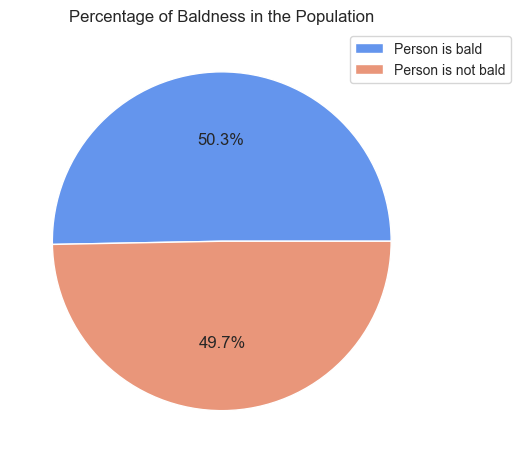

In [16]:
sns.set_style('whitegrid')
plt.figure(figsize = (5.5,5.5))
plt.pie(counts, autopct='%1.1f%%',colors = ['cornflowerblue', 'darksalmon'], 
         textprops={'fontsize': 12})
plt.title('Percentage of Baldness in the Population')
plt.legend(labels = ['Person is bald', 'Person is not bald'], bbox_to_anchor=(1.2, 1.0))

Text(0.5, 1.1, 'Age Distribution by Hair Loss')

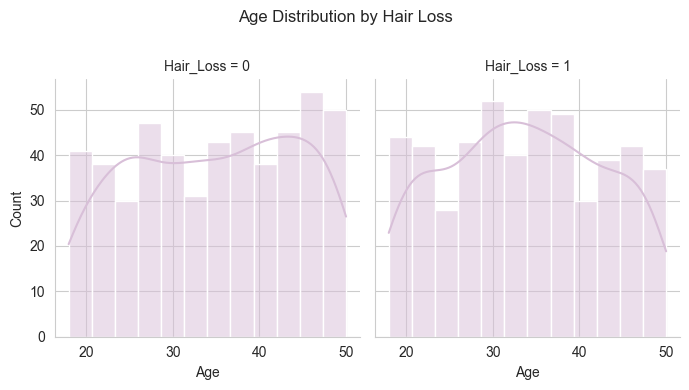

In [17]:
canvas = sns.FacetGrid(hair, col='Hair_Loss', height=3.5)
canvas.map(sns.histplot, 'Age', bins = 12, color = 'thistle', kde = True)
plt.suptitle('Age Distribution by Hair Loss', y = 1.1)

Text(0.5, 1.0, 'Counts for Stress Level by Hair Loss')

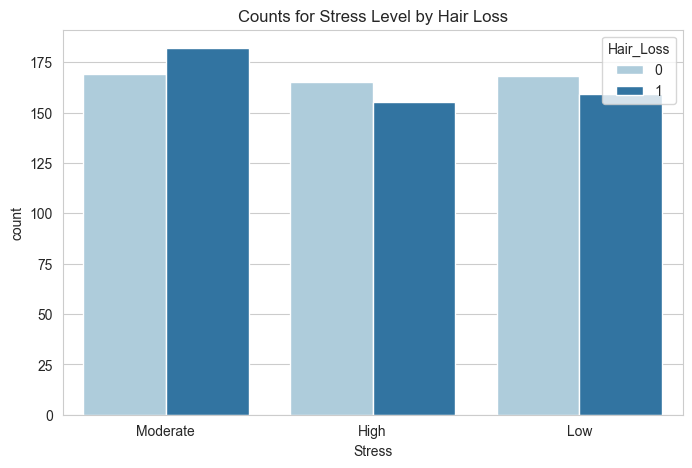

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(hair, x = 'Stress', hue = 'Hair_Loss', palette = 'Paired')
plt.title('Counts for Stress Level by Hair Loss')

Text(0.5, 1.02, 'Comparison of Hair Loss Prevalence Among Various Medical Conditions')

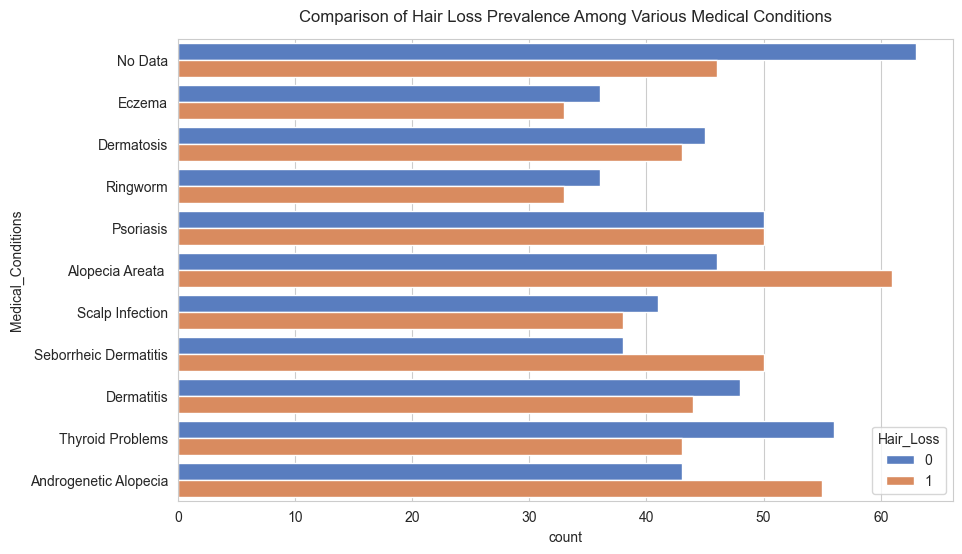

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(hair, y = 'Medical_Conditions', hue = 'Hair_Loss', palette = 'muted')
plt.title('Comparison of Hair Loss Prevalence Among Various Medical Conditions', y = 1.02)

Text(0.5, 1.02, 'Comparison of Hair Loss Prevalence Among Various Medications&Treatments')

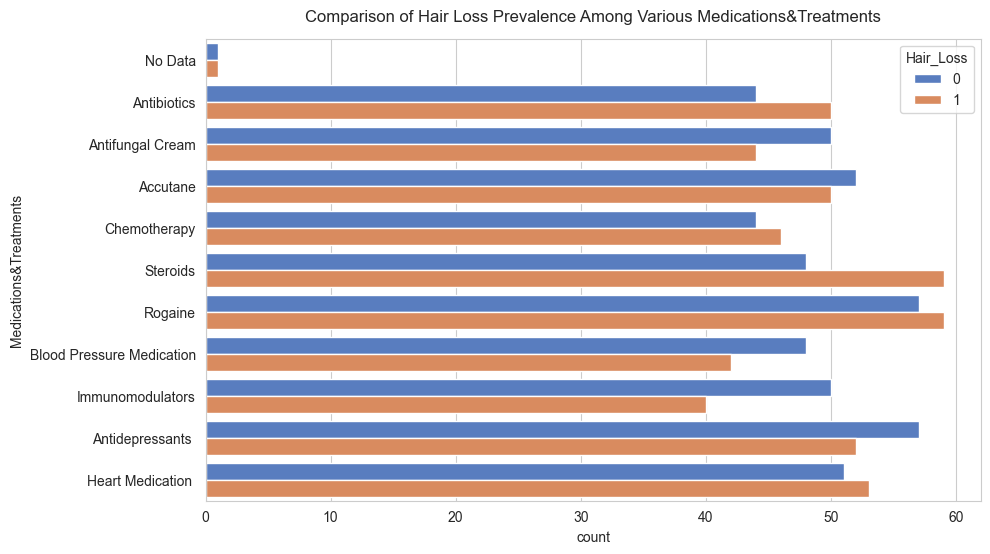

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(hair, y = 'Medications&Treatments', hue = 'Hair_Loss', palette = 'muted')
plt.title('Comparison of Hair Loss Prevalence Among Various Medications&Treatments', y = 1.02)

Text(0.5, 1.02, 'Comparison of Hair Loss Prevalence Among Various Nutritional Deficiencies')

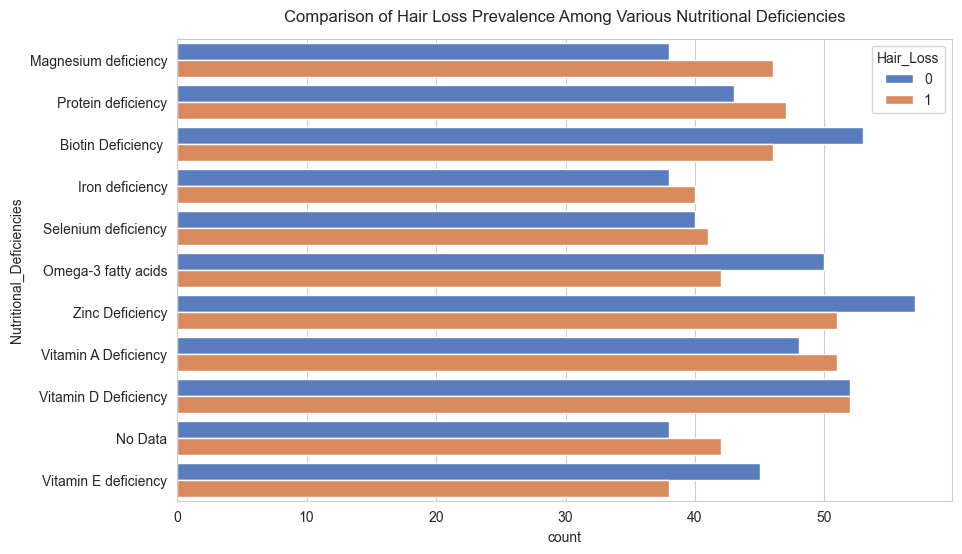

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(hair, y = 'Nutritional_Deficiencies', hue = 'Hair_Loss', palette = 'muted')
plt.title('Comparison of Hair Loss Prevalence Among Various Nutritional Deficiencies', y = 1.02)

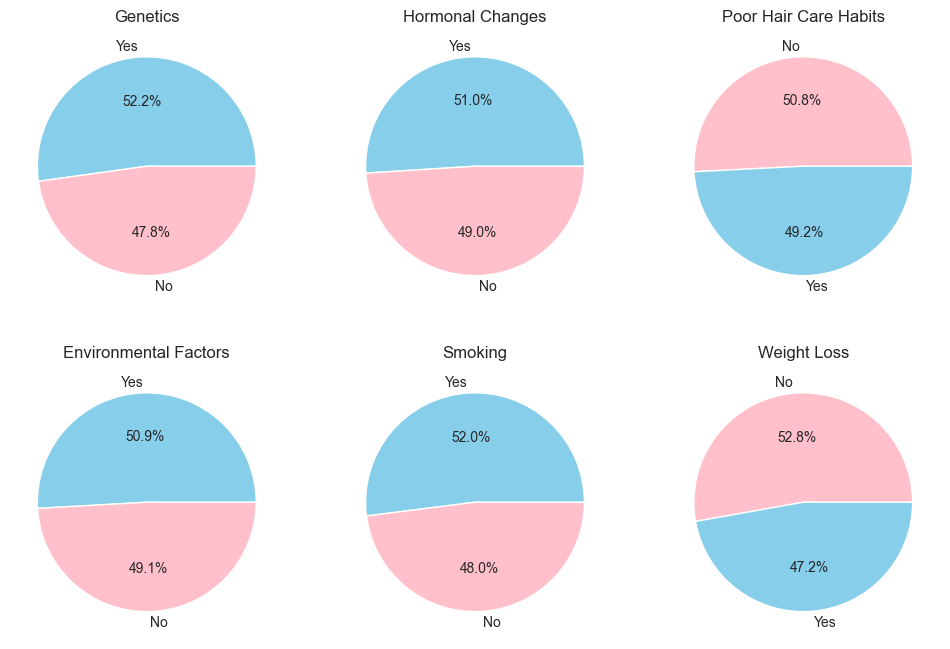

In [22]:
categorical = ['Genetics', 'Hormonal_Changes', 'Poor_Hair_Care_Habits', 'Environmental_Factors', 'Smoking', 'Weight_Loss']
color_mapping = {'Yes': 'skyblue', 'No': 'pink'}

fig, axes = plt.subplots(2, 3, figsize=(12, 8))  

for ax, category in zip(axes.flatten(), categorical):
    counts = hair[category].value_counts()
    colors = [color_mapping[label] for label in counts.index]
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=colors)
    ax.set_title(category.replace('_', ' '))

## Feature engineering 

In [23]:
hair.apply(lambda x: x.unique())

Genetics                                                            [Yes, No]
Hormonal_Changes                                                    [No, Yes]
Medical_Conditions          [No Data, Eczema, Dermatosis, Ringworm, Psoria...
Medications&Treatments      [No Data, Antibiotics, Antifungal Cream, Accut...
Nutritional_Deficiencies    [Magnesium deficiency, Protein deficiency, Bio...
Stress                                                  [Moderate, High, Low]
Age                         [19, 43, 26, 46, 30, 37, 40, 35, 49, 48, 20, 3...
Poor_Hair_Care_Habits                                               [Yes, No]
Environmental_Factors                                               [Yes, No]
Smoking                                                             [No, Yes]
Weight_Loss                                                         [No, Yes]
Hair_Loss                                                              [0, 1]
dtype: object

**Convert categorical binary columns to numeric format**

In [24]:
binary_columns = ['Genetics', 'Hormonal_Changes', 'Poor_Hair_Care_Habits', 'Environmental_Factors', 'Smoking', 'Weight_Loss']

def change_colums(df, columns):
    for column in columns:
        df[column] = df[column].map({'Yes':1, 'No':0})
change_colums(hair, binary_columns)

In [25]:
hair.apply(lambda x: x.unique())

Genetics                                                               [1, 0]
Hormonal_Changes                                                       [0, 1]
Medical_Conditions          [No Data, Eczema, Dermatosis, Ringworm, Psoria...
Medications&Treatments      [No Data, Antibiotics, Antifungal Cream, Accut...
Nutritional_Deficiencies    [Magnesium deficiency, Protein deficiency, Bio...
Stress                                                  [Moderate, High, Low]
Age                         [19, 43, 26, 46, 30, 37, 40, 35, 49, 48, 20, 3...
Poor_Hair_Care_Habits                                                  [1, 0]
Environmental_Factors                                                  [1, 0]
Smoking                                                                [0, 1]
Weight_Loss                                                            [0, 1]
Hair_Loss                                                              [0, 1]
dtype: object

**Ordinal Encoding - Stress column**                                             

In [26]:
hair['Stress'] = hair['Stress'].map({'Low': 1, 'Moderate' : 2, 'High' : 3})

In [27]:
hair.apply(lambda x: x.unique())

Genetics                                                               [1, 0]
Hormonal_Changes                                                       [0, 1]
Medical_Conditions          [No Data, Eczema, Dermatosis, Ringworm, Psoria...
Medications&Treatments      [No Data, Antibiotics, Antifungal Cream, Accut...
Nutritional_Deficiencies    [Magnesium deficiency, Protein deficiency, Bio...
Stress                                                              [2, 3, 1]
Age                         [19, 43, 26, 46, 30, 37, 40, 35, 49, 48, 20, 3...
Poor_Hair_Care_Habits                                                  [1, 0]
Environmental_Factors                                                  [1, 0]
Smoking                                                                [0, 1]
Weight_Loss                                                            [0, 1]
Hair_Loss                                                              [0, 1]
dtype: object

***Dummy Encoding***

In [28]:
hair['Medical_Conditions'].value_counts()

Medical_Conditions
No Data                  109
Alopecia Areata          107
Psoriasis                100
Thyroid Problems          99
Androgenetic Alopecia     98
Dermatitis                92
Dermatosis                88
Seborrheic Dermatitis     88
Scalp Infection           79
Eczema                    69
Ringworm                  69
Name: count, dtype: int64

In [29]:
hair['Medications&Treatments'].value_counts()

Medications&Treatments
Rogaine                      116
Antidepressants              109
Steroids                     107
Heart Medication             104
Accutane                     102
Antibiotics                   94
Antifungal Cream              94
Chemotherapy                  90
Blood Pressure Medication     90
Immunomodulators              90
No Data                        2
Name: count, dtype: int64

In [30]:
hair['Nutritional_Deficiencies'].value_counts()

Nutritional_Deficiencies
Zinc Deficiency         108
Vitamin D Deficiency    104
Biotin Deficiency        99
Vitamin A Deficiency     99
Omega-3 fatty acids      92
Protein deficiency       90
Magnesium deficiency     84
Vitamin E deficiency     83
Selenium deficiency      81
No Data                  80
Iron deficiency          78
Name: count, dtype: int64

In [31]:
hair = pd.get_dummies(hair,columns = ['Nutritional_Deficiencies','Medications&Treatments', 'Medical_Conditions'], drop_first=True, dtype='int64' )

In [32]:
hair.columns

Index(['Genetics', 'Hormonal_Changes', 'Stress', 'Age',
       'Poor_Hair_Care_Habits', 'Environmental_Factors', 'Smoking',
       'Weight_Loss', 'Hair_Loss', 'Nutritional_Deficiencies_Iron deficiency',
       'Nutritional_Deficiencies_Magnesium deficiency',
       'Nutritional_Deficiencies_No Data',
       'Nutritional_Deficiencies_Omega-3 fatty acids',
       'Nutritional_Deficiencies_Protein deficiency',
       'Nutritional_Deficiencies_Selenium deficiency',
       'Nutritional_Deficiencies_Vitamin A Deficiency',
       'Nutritional_Deficiencies_Vitamin D Deficiency',
       'Nutritional_Deficiencies_Vitamin E deficiency',
       'Nutritional_Deficiencies_Zinc Deficiency',
       'Medications&Treatments_Antibiotics',
       'Medications&Treatments_Antidepressants ',
       'Medications&Treatments_Antifungal Cream',
       'Medications&Treatments_Blood Pressure Medication',
       'Medications&Treatments_Chemotherapy',
       'Medications&Treatments_Heart Medication ',
       'Medica

In [33]:
hair = hair.loc[:, ~hair.columns.str.contains('No Data')]

In [34]:
hair.columns

Index(['Genetics', 'Hormonal_Changes', 'Stress', 'Age',
       'Poor_Hair_Care_Habits', 'Environmental_Factors', 'Smoking',
       'Weight_Loss', 'Hair_Loss', 'Nutritional_Deficiencies_Iron deficiency',
       'Nutritional_Deficiencies_Magnesium deficiency',
       'Nutritional_Deficiencies_Omega-3 fatty acids',
       'Nutritional_Deficiencies_Protein deficiency',
       'Nutritional_Deficiencies_Selenium deficiency',
       'Nutritional_Deficiencies_Vitamin A Deficiency',
       'Nutritional_Deficiencies_Vitamin D Deficiency',
       'Nutritional_Deficiencies_Vitamin E deficiency',
       'Nutritional_Deficiencies_Zinc Deficiency',
       'Medications&Treatments_Antibiotics',
       'Medications&Treatments_Antidepressants ',
       'Medications&Treatments_Antifungal Cream',
       'Medications&Treatments_Blood Pressure Medication',
       'Medications&Treatments_Chemotherapy',
       'Medications&Treatments_Heart Medication ',
       'Medications&Treatments_Immunomodulators',
       

In [35]:
hair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 36 columns):
 #   Column                                            Non-Null Count  Dtype
---  ------                                            --------------  -----
 0   Genetics                                          998 non-null    int64
 1   Hormonal_Changes                                  998 non-null    int64
 2   Stress                                            998 non-null    int64
 3   Age                                               998 non-null    int64
 4   Poor_Hair_Care_Habits                             998 non-null    int64
 5   Environmental_Factors                             998 non-null    int64
 6   Smoking                                           998 non-null    int64
 7   Weight_Loss                                       998 non-null    int64
 8   Hair_Loss                                         998 non-null    int64
 9   Nutritional_Deficiencies_Iron deficiency   

## Dependency Analysis between Hair Loss and Other Features

**Chi-Square Test** 

In [36]:
ref = 'Hair_Loss'
selected = hair.drop(['Age','Hair_Loss' ], axis=1)
result_list = []

for col in selected.columns:
    if col != ref:
        contingency_table = pd.crosstab(hair[ref], selected[col])
        chi2, p, dof, _ = chi2_contingency(contingency_table)
        result_list.append({'Variable': col, 'Chi2': chi2, 'p-value': p})
result_df = pd.DataFrame(result_list)

In [37]:
def highlight(s):
    if s['p-value'] < 0.25 :
        return ['background-color: skyblue'] * len(s)

In [38]:
result_df.sort_values(by = 'p-value').style.apply(highlight, axis=1)

,Variable,Chi2,p-value
5,Smoking,2.900642,0.088544
6,Weight_Loss,1.744868,0.186523
32,Medical_Conditions_Seborrheic Dermatitis,1.656570,0.198067
25,Medical_Conditions_Androgenetic Alopecia,1.519788,0.217652
0,Genetics,1.470019,0.225343
33,Medical_Conditions_Thyroid Problems,1.458571,0.227158
3,Poor_Hair_Care_Habits,1.454655,0.227783
24,Medications&Treatments_Steroids,1.185868,0.276165
22,Medications&Treatments_Immunomodulators,0.873871,0.349886
8,Nutritional_Deficiencies_Magnesium deficiency,0.732189,0.392175


**Point-Biserial Correlation**

In [39]:
corr, p_value = pointbiserialr(hair['Hair_Loss'], hair['Age'])
print(f'correlation = {corr}, p_value = {p_value}')

correlation = -0.06086355882335799, p_value = 0.05459046078027132


In [40]:
selected_features = result_df[result_df['p-value'] < 0.25]['Variable'].tolist()
selected_features.append('Age')

## Splitting Data

In [41]:
X = hair.drop('Hair_Loss', axis = 1)
y = hair['Hair_Loss']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [43]:
print(X_train.shape, X_test.shape)

(798, 35) (200, 35)


In [44]:
print(y_train.value_counts())
print(y_test.value_counts())

Hair_Loss
0    403
1    395
Name: count, dtype: int64
Hair_Loss
1    101
0     99
Name: count, dtype: int64


***Balanced classes justify the use of accuracy for evaluation purposes***

### Features Scaling

In [45]:
scaler = MinMaxScaler().fit(X_train['Age'].values.reshape(-1, 1))
X_train['Age'] = scaler.transform(X_train['Age'].values.reshape(-1, 1))
X_test['Age']  = scaler.transform(X_test['Age'].values.reshape(-1, 1))

## Models

In [46]:
def ModelFinder(X_train, y_train, estimator, param_grid):
    try:
        # Check if the estimator has coef_ or feature_importances_ attributes required by RFECV
        if hasattr(estimator.fit(X_train,y_train), 'coef_') or hasattr(estimator.fit(X_train,y_train), 'feature_importances_'):
            
            selector = RFECV(estimator=estimator, step=1, cv=10, scoring='accuracy', n_jobs=6, min_features_to_select=5, verbose=2)
            X_train_transformed = selector.fit_transform(X_train, y_train)

            plt.title("RFECV - Number of Features vs. Accuracy")
            plt.xlabel("Number of Features")
            plt.ylabel("Cross-Validation Score (Accuracy)")
            plt.plot(range(1, len(selector.cv_results_['mean_test_score']) + 1), selector.cv_results_['mean_test_score'])
            plt.show()            
        else:
            # If the estimator doesn't support RFECV directly, use the full feature set
            print("The estimator does not directly support RFECV. Using the full feature set.")
            X_train_transformed = X_train
    except Exception as e:
        print(f"An error occurred during RFECV: {e}")
        X_train_transformed = X_train
        
        if X_test is not None:
            X_test_transformed = X_test

    # GridSearchCV
    grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)
    grid_search.fit(X_train_transformed, y_train)

    # Results
    results = {
        'n_features': X_train_transformed.shape[1] if hasattr(estimator.fit(X_train,y_train), 'coef_') or hasattr(estimator.fit(X_train,y_train), 'feature_importances_') else "N/A",
        'accuracy_score': grid_search.best_score_,
        'best_params': grid_search.best_params_,
    }
    
    if hasattr(estimator.fit(X_train,y_train), 'coef_') or hasattr(estimator.fit(X_train,y_train), 'feature_importances_'):
        results.update({
            'selected_features_indices': selector.get_support(indices=True) if hasattr(selector, 'support_') else "N/A",
            'selected_features_mask': selector.support_ if hasattr(selector, 'support_') else "N/A",
        })

    return results

In [47]:
def printInformation(X_train, y_train, X_test, y_test, model):
    # Generate prediction
    test_predictions  = model.predict(X_test)
    train_predictions = model.predict(X_train)
    
    # Convert predictions to binary if using a Sequential model
    if (isinstance(model,Sequential )):
        test_predictions  = (test_predictions > 0.5)  * 1 
        train_predictions = (train_predictions > 0.5) * 1 
        
    # Print classification reports    
    print('Information for test data')
    print(classification_report(y_test, test_predictions))
    print('Information for train data')
    print(classification_report(y_train, train_predictions))

    # Calculate confusion matrix
    cm_train = confusion_matrix(y_train, train_predictions)
    cm_test  = confusion_matrix(y_test, test_predictions)

    # Plot confusion matrix
    fig,ax = plt.subplots(1,2, figsize = (10,4))
    ConfusionMatrixDisplay(confusion_matrix = cm_train,display_labels=[0,1]).plot(ax = ax[0])
    ax[0].set_title('Training Data')
    ax[1].set_title('Testing Data')
    ConfusionMatrixDisplay(confusion_matrix = cm_test,display_labels=[0,1]).plot(ax = ax[1])
    fig.suptitle('Confusion Matrix')
    
    # Calculate ROC curves and AUC
    fpr_train, tpr_train, _ = roc_curve(y_train, train_predictions)
    roc_auc_train = auc(fpr_train, tpr_train)
    fpr_test, tpr_test, _ = roc_curve(y_test, test_predictions)
    roc_auc_test = auc(fpr_test, tpr_test)
    
    # Plot ROC curves
    fig, ax_roc = plt.subplots(figsize=(5, 5))
    ax_roc.plot(fpr_train, tpr_train, label=f'Train ROC curve (area = {roc_auc_train:.2f})', color='blue', lw=2)
    ax_roc.plot(fpr_test, tpr_test, label=f'Test ROC curve (area = {roc_auc_test:.2f})', color='darkorange', lw=2)
    ax_roc.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax_roc.set_xlim([0.0, 1.0])
    ax_roc.set_ylim([0.0, 1.05])
    ax_roc.set_xlabel('False Positive Rate')
    ax_roc.set_ylabel('True Positive Rate')
    ax_roc.set_title('Receiver Operating Characteristic (ROC)')
    ax_roc.legend(loc="lower right")
    
    plt.show()

### Logistic Regression

Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.


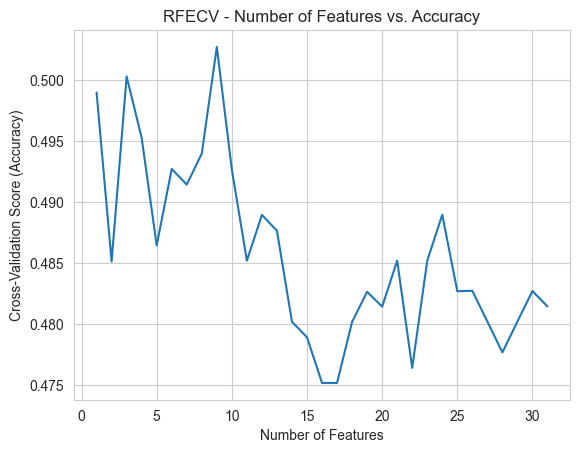

In [48]:
results_logreg = ModelFinder(X_train, y_train, LogisticRegression(max_iter=500, random_state = 101, class_weight = 'balanced'), 
                            {'C': [0.0001, 0.001, 0.001, 0.1, 1, 10, 100]})

In [49]:
results_logreg

{'n_features': 13,
 'accuracy_score': 0.552768987341772,
 'best_params': {'C': 1},
 'selected_features_indices': array([ 0,  3,  6,  7,  9, 15, 17, 22, 24, 25, 26, 31, 33], dtype=int64),
 'selected_features_mask': array([ True, False, False,  True, False, False,  True,  True, False,
         True, False, False, False, False, False,  True, False,  True,
        False, False, False, False,  True, False,  True,  True,  True,
        False, False, False, False,  True, False,  True, False])}

In [50]:
X_train_selected = X_train.iloc[:,results_logreg['selected_features_indices']]
X_test_selected  = X_test.iloc[:,results_logreg['selected_features_indices']]
X_train_selected.columns

Index(['Genetics', 'Age', 'Smoking', 'Weight_Loss',
       'Nutritional_Deficiencies_Magnesium deficiency',
       'Nutritional_Deficiencies_Vitamin E deficiency',
       'Medications&Treatments_Antibiotics',
       'Medications&Treatments_Heart Medication ',
       'Medications&Treatments_Rogaine', 'Medications&Treatments_Steroids',
       'Medical_Conditions_Androgenetic Alopecia',
       'Medical_Conditions_Ringworm',
       'Medical_Conditions_Seborrheic Dermatitis'],
      dtype='object')

In [51]:
logreg = LogisticRegression(C = 1, random_state=101, class_weight = 'balanced').fit(X_train_selected, y_train)

Information for test data
              precision    recall  f1-score   support

           0       0.47      0.48      0.48        99
           1       0.48      0.47      0.47       101

    accuracy                           0.48       200
   macro avg       0.48      0.48      0.47       200
weighted avg       0.48      0.47      0.47       200

Information for train data
              precision    recall  f1-score   support

           0       0.58      0.57      0.57       403
           1       0.57      0.58      0.58       395

    accuracy                           0.58       798
   macro avg       0.58      0.58      0.58       798
weighted avg       0.58      0.58      0.58       798



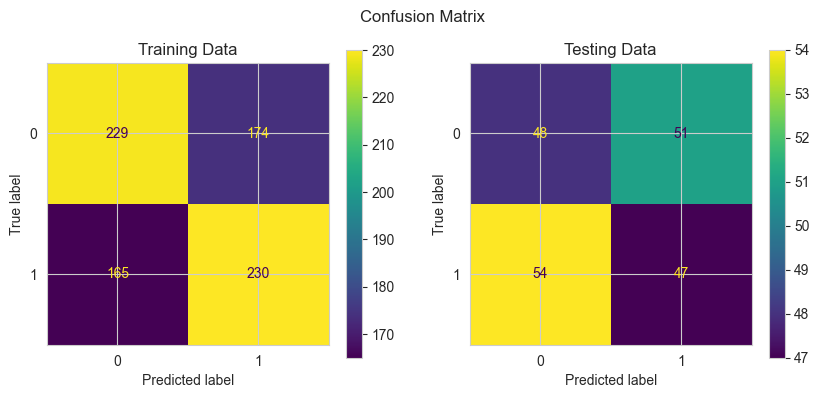

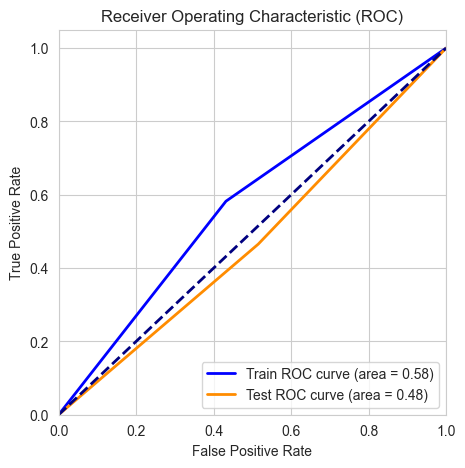

In [52]:
printInformation(X_train_selected, y_train, X_test_selected, y_test, logreg)

### Decision Tree

Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.


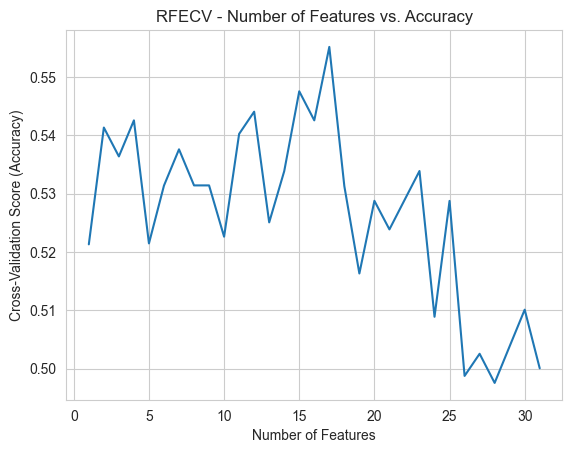

In [53]:
results_tree = ModelFinder(X_train, y_train, DecisionTreeClassifier(random_state= 101),
                        { 'max_depth': [2 * x for x in range(2,8)], 
                          'criterion':['gini','entropy'],
                          'splitter': ['best', 'random']})

In [54]:
results_tree

{'n_features': 21,
 'accuracy_score': 0.5476424050632911,
 'best_params': {'criterion': 'entropy', 'max_depth': 8, 'splitter': 'best'},
 'selected_features_indices': array([ 0,  1,  2,  3,  4,  5,  6,  7,  9, 10, 16, 20, 21, 22, 23, 24, 25,
        30, 31, 32, 34], dtype=int64),
 'selected_features_mask': array([ True,  True,  True,  True,  True,  True,  True,  True, False,
         True,  True, False, False, False, False, False,  True, False,
        False, False,  True,  True,  True,  True,  True,  True, False,
        False, False, False,  True,  True,  True, False,  True])}

In [55]:
X_train_selected = X_train.iloc[:,results_tree['selected_features_indices']]
X_test_selected  = X_test.iloc[:,results_tree['selected_features_indices']]
X_train_selected.columns

Index(['Genetics', 'Hormonal_Changes', 'Stress', 'Age',
       'Poor_Hair_Care_Habits', 'Environmental_Factors', 'Smoking',
       'Weight_Loss', 'Nutritional_Deficiencies_Magnesium deficiency',
       'Nutritional_Deficiencies_Omega-3 fatty acids',
       'Nutritional_Deficiencies_Zinc Deficiency',
       'Medications&Treatments_Blood Pressure Medication',
       'Medications&Treatments_Chemotherapy',
       'Medications&Treatments_Heart Medication ',
       'Medications&Treatments_Immunomodulators',
       'Medications&Treatments_Rogaine', 'Medications&Treatments_Steroids',
       'Medical_Conditions_Psoriasis', 'Medical_Conditions_Ringworm',
       'Medical_Conditions_Scalp Infection',
       'Medical_Conditions_Thyroid Problems'],
      dtype='object')

In [56]:
tree = DecisionTreeClassifier(random_state=101, criterion='entropy', max_depth=8).fit(X_train_selected,y_train)

Information for test data
              precision    recall  f1-score   support

           0       0.52      0.41      0.46        99
           1       0.52      0.62      0.57       101

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.51       200
weighted avg       0.52      0.52      0.51       200

Information for train data
              precision    recall  f1-score   support

           0       0.83      0.64      0.72       403
           1       0.70      0.87      0.78       395

    accuracy                           0.75       798
   macro avg       0.77      0.75      0.75       798
weighted avg       0.77      0.75      0.75       798



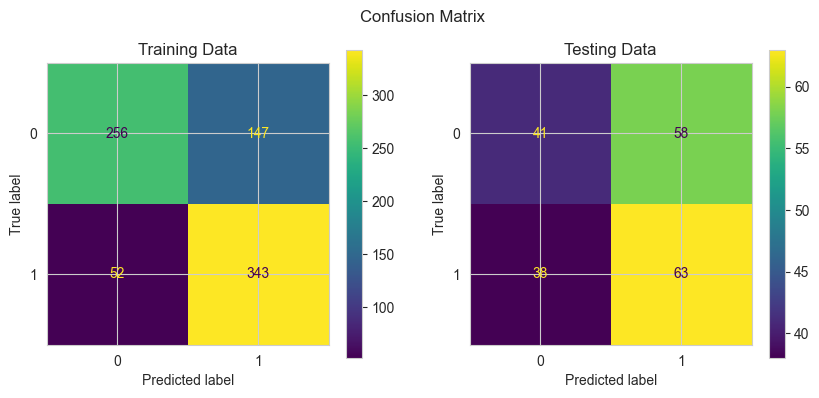

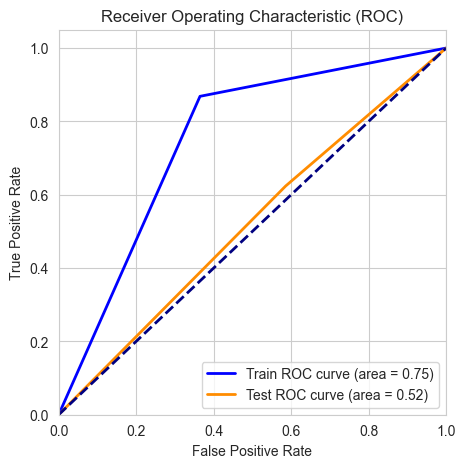

In [57]:
printInformation(X_train_selected, y_train, X_test_selected, y_test, tree)

### Random Forest

Fitting estimator with 35 features.
Fitting estimator with 34 features.


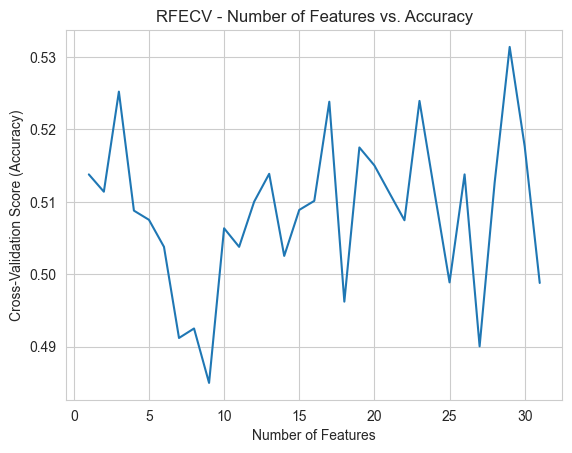

In [58]:
results_forest = ModelFinder(X_train, y_train, RandomForestClassifier(random_state=101),
                            {'n_estimators': [5, 10, 50, 100, 200],  
                             'max_depth': [2 * x for x in range(2,8)],  
                             'criterion' :['gini', 'entropy']
                            })

In [59]:
results_forest

{'n_features': 33,
 'accuracy_score': 0.5389398734177215,
 'best_params': {'criterion': 'entropy', 'max_depth': 14, 'n_estimators': 5},
 'selected_features_indices': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 33, 34],
       dtype=int64),
 'selected_features_mask': array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True, False, False,  True,  True])}

In [60]:
X_train_selected = X_train.iloc[:,results_forest['selected_features_indices']]
X_test_selected = X_test.iloc[:,results_forest['selected_features_indices']]
X_train_selected.columns

Index(['Genetics', 'Hormonal_Changes', 'Stress', 'Age',
       'Poor_Hair_Care_Habits', 'Environmental_Factors', 'Smoking',
       'Weight_Loss', 'Nutritional_Deficiencies_Iron deficiency',
       'Nutritional_Deficiencies_Magnesium deficiency',
       'Nutritional_Deficiencies_Omega-3 fatty acids',
       'Nutritional_Deficiencies_Protein deficiency',
       'Nutritional_Deficiencies_Selenium deficiency',
       'Nutritional_Deficiencies_Vitamin A Deficiency',
       'Nutritional_Deficiencies_Vitamin D Deficiency',
       'Nutritional_Deficiencies_Vitamin E deficiency',
       'Nutritional_Deficiencies_Zinc Deficiency',
       'Medications&Treatments_Antibiotics',
       'Medications&Treatments_Antidepressants ',
       'Medications&Treatments_Antifungal Cream',
       'Medications&Treatments_Blood Pressure Medication',
       'Medications&Treatments_Chemotherapy',
       'Medications&Treatments_Heart Medication ',
       'Medications&Treatments_Immunomodulators',
       'Medications&

In [61]:
forest = RandomForestClassifier(random_state=101, max_depth=14, criterion='entropy', n_estimators=5).fit(X_train_selected,y_train)

Information for test data
              precision    recall  f1-score   support

           0       0.57      0.53      0.55        99
           1       0.57      0.61      0.59       101

    accuracy                           0.57       200
   macro avg       0.57      0.57      0.57       200
weighted avg       0.57      0.57      0.57       200

Information for train data
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       403
           1       0.87      0.92      0.90       395

    accuracy                           0.89       798
   macro avg       0.90      0.90      0.89       798
weighted avg       0.90      0.89      0.89       798



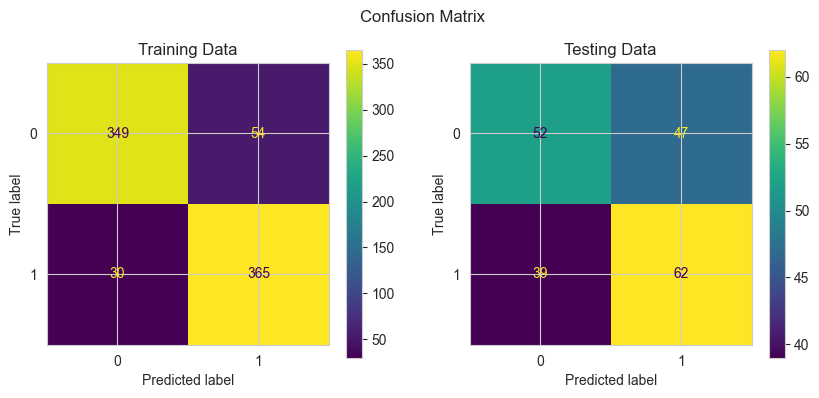

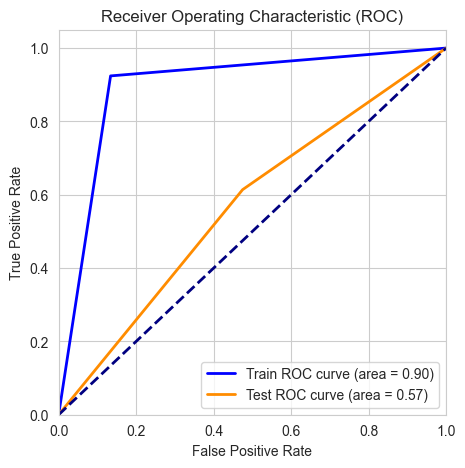

In [62]:
printInformation(X_train_selected, y_train, X_test_selected, y_test, forest)

### Gradient Boosting

Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.


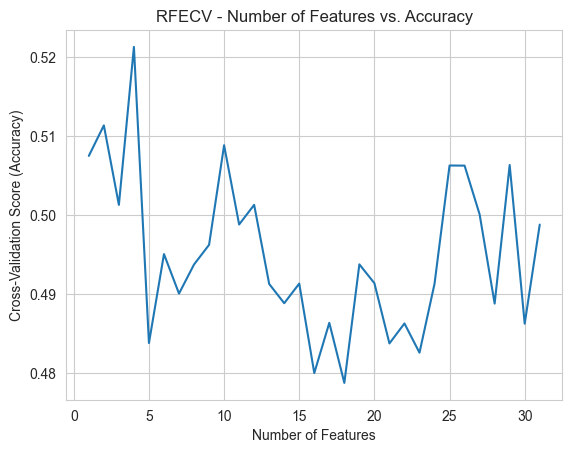

In [63]:
results_gbc = ModelFinder(X_train, y_train, GradientBoostingClassifier(random_state=101),
                         {'n_estimators': [10, 50, 100, 200],  
                          'max_depth': [2 * x for x in range(2,8)], 
                          'criterion' :['friedman_mse', 'squared_error'],
                          'learning_rate': [ 0.025, 0.05, 0.1, 0.2]
                         })

In [64]:
results_gbc

{'n_features': 8,
 'accuracy_score': 0.5550791139240507,
 'best_params': {'criterion': 'friedman_mse',
  'learning_rate': 0.1,
  'max_depth': 4,
  'n_estimators': 200},
 'selected_features_indices': array([ 0,  1,  3,  8, 16, 23, 26, 31], dtype=int64),
 'selected_features_mask': array([ True,  True, False,  True, False, False, False, False,  True,
        False, False, False, False, False, False, False,  True, False,
        False, False, False, False, False,  True, False, False,  True,
        False, False, False, False,  True, False, False, False])}

In [65]:
X_train_selected = X_train.iloc[:,results_gbc['selected_features_indices']]
X_test_selected = X_test.iloc[:,results_gbc['selected_features_indices']]
X_train_selected.columns

Index(['Genetics', 'Hormonal_Changes', 'Age',
       'Nutritional_Deficiencies_Iron deficiency',
       'Nutritional_Deficiencies_Zinc Deficiency',
       'Medications&Treatments_Immunomodulators',
       'Medical_Conditions_Androgenetic Alopecia',
       'Medical_Conditions_Ringworm'],
      dtype='object')

In [66]:
gbc = GradientBoostingClassifier(random_state=101, max_depth= 4, criterion='friedman_mse',  n_estimators=200, learning_rate=0.1).fit(X_train_selected,y_train)

Information for test data
              precision    recall  f1-score   support

           0       0.47      0.49      0.48        99
           1       0.48      0.46      0.47       101

    accuracy                           0.48       200
   macro avg       0.48      0.48      0.47       200
weighted avg       0.48      0.47      0.47       200

Information for train data
              precision    recall  f1-score   support

           0       0.78      0.75      0.76       403
           1       0.75      0.78      0.77       395

    accuracy                           0.76       798
   macro avg       0.76      0.76      0.76       798
weighted avg       0.76      0.76      0.76       798



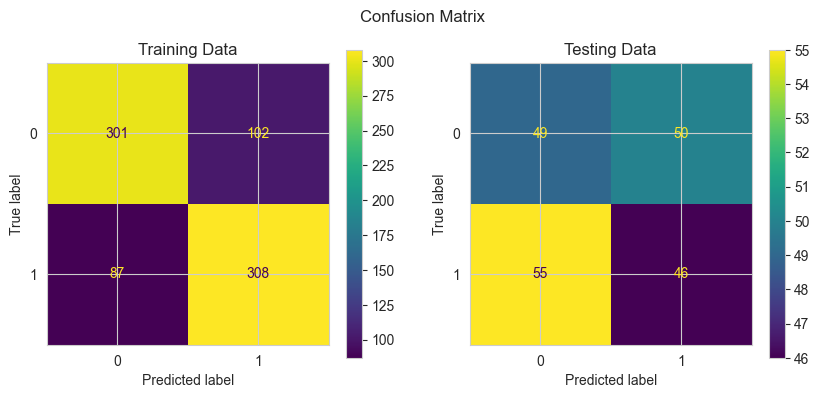

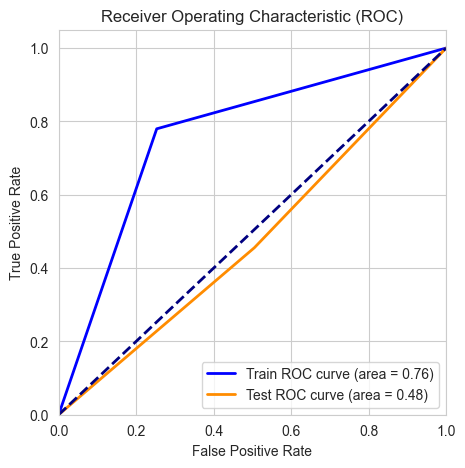

In [67]:
printInformation(X_train_selected, y_train, X_test_selected, y_test, gbc)

### K-nearest Neighbors

In [68]:
results_knc = ModelFinder(X_train, y_train, KNeighborsClassifier(),
              {'weights': ['uniform', 'distance'],  # Liczba drzew
               'n_neighbors': [5, 7, 9, 11, 15, 33, 66, 99],
               'metric': ['euclidean', 'manhattan']
              })

The estimator does not directly support RFECV. Using the full feature set.


In [69]:
results_knc

{'n_features': 'N/A',
 'accuracy_score': 0.5137025316455696,
 'best_params': {'metric': 'manhattan',
  'n_neighbors': 9,
  'weights': 'distance'}}

In [70]:
knc = KNeighborsClassifier(n_neighbors=9, weights='distance', metric='manhattan').fit(X_train, y_train)

  File "C:\Users\kuban\anaconda3\envs\new_env\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Information for test data
              precision    recall  f1-score   support

           0       0.52      0.49      0.51        99
           1       0.52      0.54      0.53       101

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.52      0.52      0.52       200

Information for train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       403
           1       1.00      1.00      1.00       395

    accuracy                           1.00       798
   macro avg       1.00      1.00      1.00       798
weighted avg       1.00      1.00      1.00       798



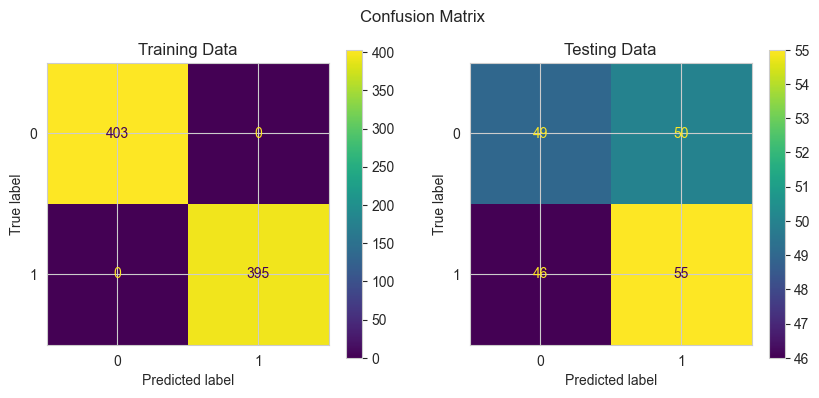

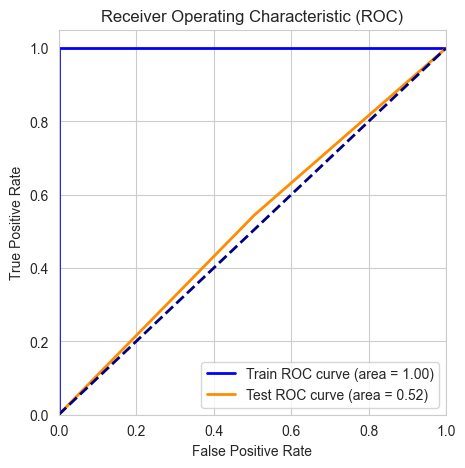

In [71]:
printInformation(X_train, y_train, X_test, y_test, knc)

In [72]:
X_train_selected = X_train.loc[:,selected_features]
X_test_selected = X_test.loc[:,selected_features]
X_train_selected.columns

Index(['Genetics', 'Poor_Hair_Care_Habits', 'Smoking', 'Weight_Loss',
       'Medical_Conditions_Androgenetic Alopecia',
       'Medical_Conditions_Seborrheic Dermatitis',
       'Medical_Conditions_Thyroid Problems', 'Age'],
      dtype='object')

In [73]:
results_knc = ModelFinder(X_train_selected, y_train, KNeighborsClassifier(),
              {'weights': ['uniform', 'distance'],  # Liczba drzew
               'n_neighbors': [5, 7, 9, 11, 15, 33, 66, 99],
               'metric': ['euclidean', 'manhattan']
              })

The estimator does not directly support RFECV. Using the full feature set.


In [74]:
results_knc

{'n_features': 'N/A',
 'accuracy_score': 0.5276424050632911,
 'best_params': {'metric': 'euclidean',
  'n_neighbors': 66,
  'weights': 'uniform'}}

In [75]:
knc = KNeighborsClassifier(n_neighbors=66, weights='uniform', metric='euclidean').fit(X_train_selected, y_train)

Information for test data
              precision    recall  f1-score   support

           0       0.50      0.63      0.56        99
           1       0.52      0.40      0.45       101

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.51      0.51      0.50       200

Information for train data
              precision    recall  f1-score   support

           0       0.56      0.66      0.61       403
           1       0.57      0.47      0.52       395

    accuracy                           0.57       798
   macro avg       0.57      0.56      0.56       798
weighted avg       0.57      0.57      0.56       798



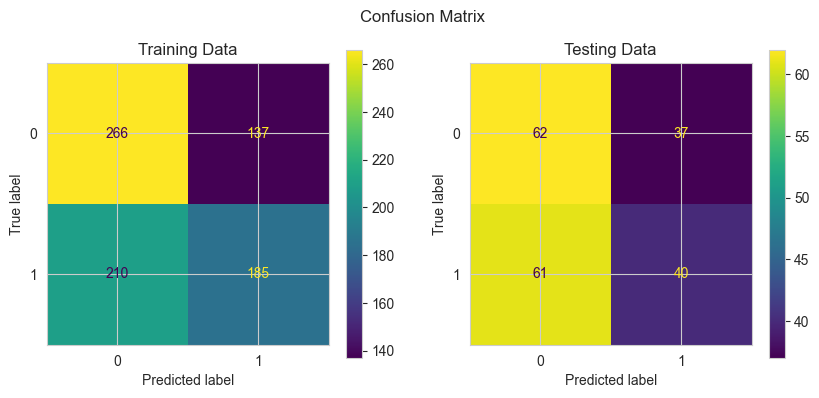

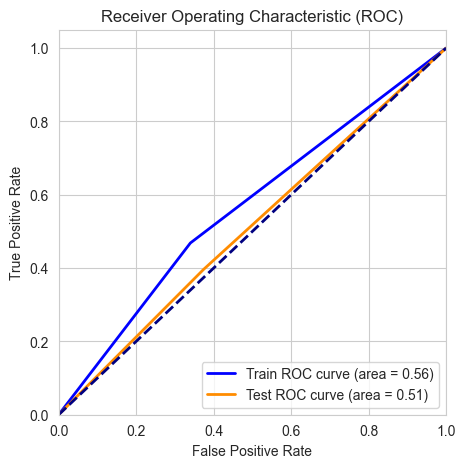

In [76]:
printInformation(X_train_selected, y_train, X_test_selected, y_test, knc)

### Support Vectors

In [77]:
results_svc = ModelFinder(X_train, y_train, SVC(random_state=101),
             {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001],  
              'kernel': ['rbf', 'poly', 'sigmoid']
             })

The estimator does not directly support RFECV. Using the full feature set.


In [78]:
results_svc

{'n_features': 'N/A',
 'accuracy_score': 0.5199525316455695,
 'best_params': {'C': 10, 'gamma': 0.1, 'kernel': 'sigmoid'}}

In [79]:
svc = SVC(random_state=101, C=10, gamma=0.1, kernel='sigmoid').fit(X_train, y_train) 

Information for test data
              precision    recall  f1-score   support

           0       0.49      0.45      0.47        99
           1       0.50      0.53      0.52       101

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.49      0.49      0.49       200

Information for train data
              precision    recall  f1-score   support

           0       0.51      0.53      0.52       403
           1       0.50      0.49      0.50       395

    accuracy                           0.51       798
   macro avg       0.51      0.51      0.51       798
weighted avg       0.51      0.51      0.51       798



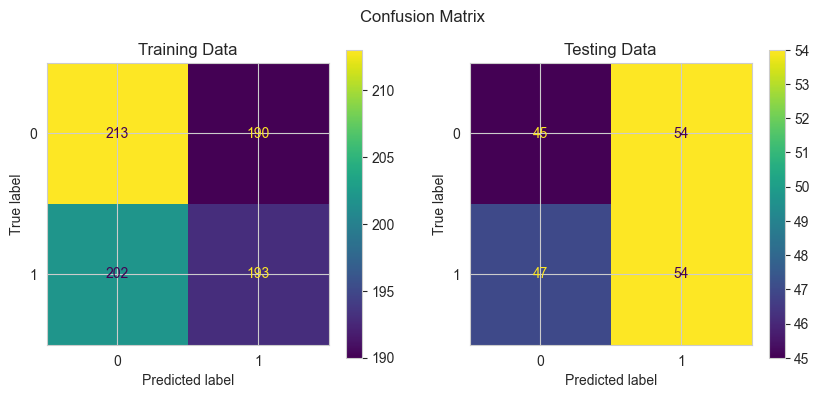

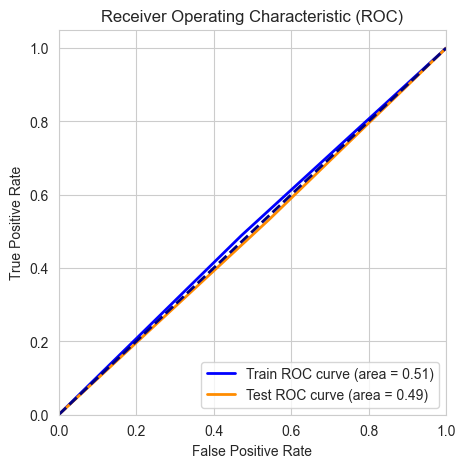

In [80]:
printInformation(X_train, y_train, X_test, y_test, svc)

In [81]:
results_svc = ModelFinder(X_train_selected, y_train, SVC(random_state=101),
             {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001],  
              'kernel': ['rbf', 'poly', 'sigmoid']
             })

The estimator does not directly support RFECV. Using the full feature set.


In [82]:
results_svc

{'n_features': 'N/A',
 'accuracy_score': 0.5552531645569619,
 'best_params': {'C': 0.1, 'gamma': 1, 'kernel': 'sigmoid'}}

In [83]:
svc = SVC(random_state=101, C=0.1, gamma=1, kernel='sigmoid').fit(X_train_selected, y_train) 

Information for test data
              precision    recall  f1-score   support

           0       0.58      0.49      0.54        99
           1       0.57      0.65      0.61       101

    accuracy                           0.57       200
   macro avg       0.58      0.57      0.57       200
weighted avg       0.58      0.57      0.57       200

Information for train data
              precision    recall  f1-score   support

           0       0.53      0.47      0.50       403
           1       0.52      0.58      0.55       395

    accuracy                           0.53       798
   macro avg       0.53      0.53      0.52       798
weighted avg       0.53      0.53      0.52       798



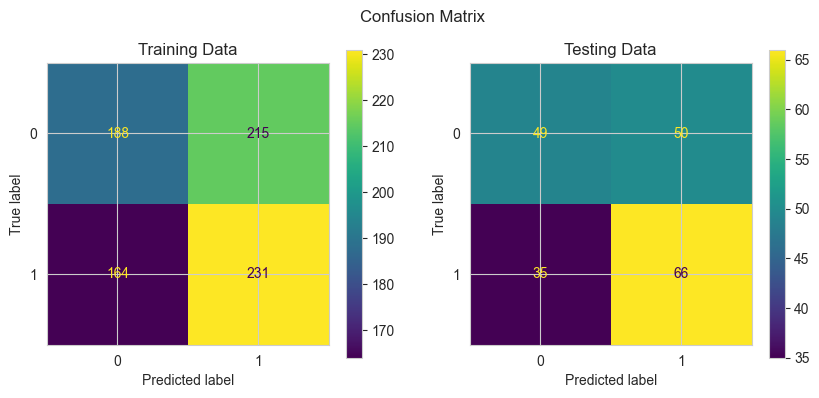

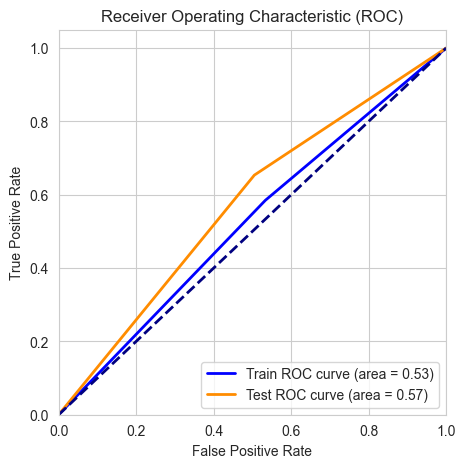

In [84]:
printInformation(X_train_selected, y_train, X_test_selected, y_test, svc)

### Naive Bayes 

In [85]:
results_naive = ModelFinder(X_train, y_train, BernoulliNB(),
               {'alpha': [0.01, 0.1, 1.0, 10.0], 
                'binarize': [0.0, 0.1, 0.2],  
               })


The estimator does not directly support RFECV. Using the full feature set.


In [86]:
results_naive

{'n_features': 'N/A',
 'accuracy_score': 0.47501582278481014,
 'best_params': {'alpha': 0.1, 'binarize': 0.1}}

In [87]:
naive = BernoulliNB( alpha=0.1, binarize=0.1).fit(X_train, y_train)

Information for test data
              precision    recall  f1-score   support

           0       0.51      0.60      0.55        99
           1       0.53      0.45      0.48       101

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.52      0.52      0.52       200

Information for train data
              precision    recall  f1-score   support

           0       0.59      0.61      0.60       403
           1       0.58      0.56      0.57       395

    accuracy                           0.59       798
   macro avg       0.59      0.59      0.58       798
weighted avg       0.59      0.59      0.59       798



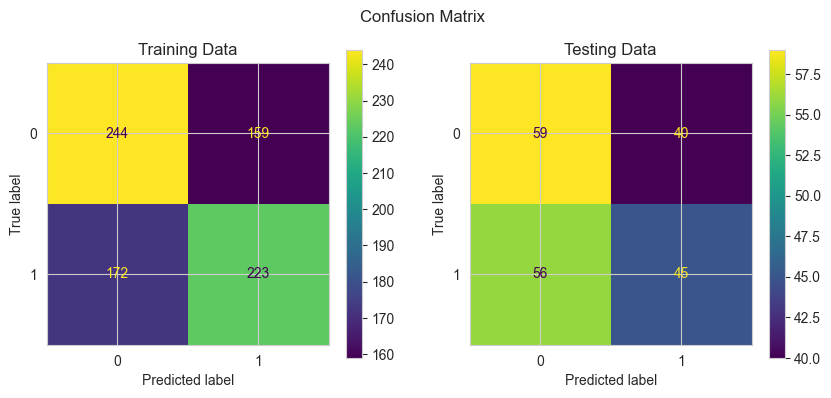

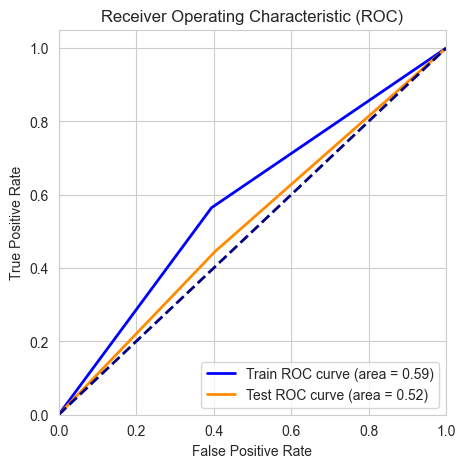

In [88]:
printInformation(X_train, y_train, X_test, y_test, naive)

In [89]:
results_naive = ModelFinder(X_train_selected, y_train, BernoulliNB(),
               {'alpha': [0.01, 0.1, 1.0, 10.0], 
                'binarize': [0.0, 0.1, 0.2],  
               })

The estimator does not directly support RFECV. Using the full feature set.


In [90]:
results_naive

{'n_features': 'N/A',
 'accuracy_score': 0.5339240506329114,
 'best_params': {'alpha': 1.0, 'binarize': 0.2}}

In [91]:
naive = BernoulliNB( alpha=1.0, binarize=0.2).fit(X_train_selected, y_train)

Information for test data
              precision    recall  f1-score   support

           0       0.58      0.49      0.54        99
           1       0.57      0.65      0.61       101

    accuracy                           0.57       200
   macro avg       0.58      0.57      0.57       200
weighted avg       0.58      0.57      0.57       200

Information for train data
              precision    recall  f1-score   support

           0       0.53      0.47      0.50       403
           1       0.52      0.58      0.55       395

    accuracy                           0.53       798
   macro avg       0.53      0.53      0.52       798
weighted avg       0.53      0.53      0.52       798



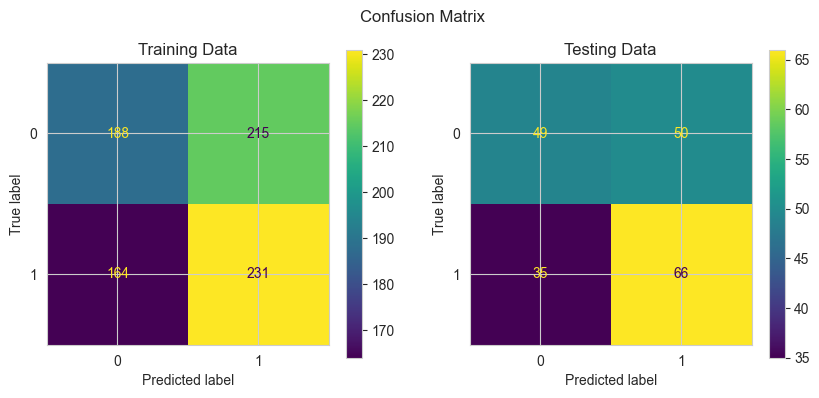

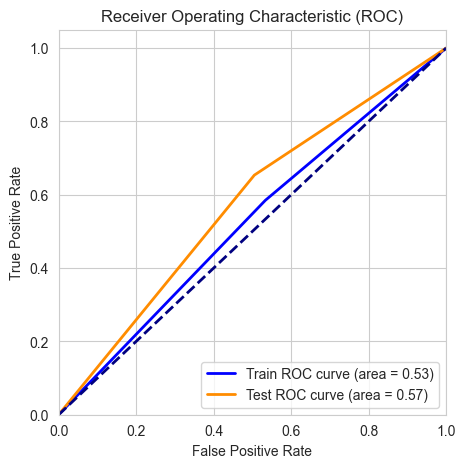

In [92]:
printInformation(X_train_selected, y_train, X_test_selected, y_test, svc)

### Neural Network

In [93]:
X_train.shape

(798, 35)

In [94]:
seed = 42
tf.random.set_seed(seed)

In [95]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

In [96]:
class_weights = compute_class_weight(class_weight='balanced', classes=[0,1], y=y_train)
class_weight_dict = dict(zip([0,1], class_weights))

In [97]:
model = Sequential()
model.add(Dense(64, activation = 'relu', input_dim = 35))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.2))


model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

In [98]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

In [99]:
model.fit(x=X_train, y=y_train,  batch_size=16, epochs=50,  callbacks=[early_stop], validation_split=0.2,  class_weight=class_weight_dict)

Epoch 1/50


40/40 [==============================] - 1s 6ms/step - loss: 0.7039 - accuracy: 0.5078 - val_loss: 0.6994 - val_accuracy: 0.5063
Epoch 2/50
40/40 [==============================] - 0s 3ms/step - loss: 0.6992 - accuracy: 0.5157 - val_loss: 0.6994 - val_accuracy: 0.4875
Epoch 3/50
40/40 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5188 - val_loss: 0.6998 - val_accuracy: 0.4750
Epoch 4/50
40/40 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5611 - val_loss: 0.7021 - val_accuracy: 0.4750
Epoch 5/50
40/40 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.5172 - val_loss: 0.7027 - val_accuracy: 0.4625
Epoch 6/50
40/40 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5188 - val_loss: 0.7029 - val_accuracy: 0.4437
Epoch 7/50
40/40 [==============================] - 0s 3ms/step - loss: 0.6896 - accuracy: 0.5423 - val_loss: 0.7028 - val_accuracy: 0.4437
Epoch 8/50
40/40 [

25/25 [==============================] - 0s 1ms/step
Information for test data
              precision    recall  f1-score   support

         0.0       0.55      0.41      0.47        99
         1.0       0.54      0.66      0.59       101

    accuracy                           0.54       200
   macro avg       0.54      0.54      0.53       200
weighted avg       0.54      0.54      0.53       200

Information for train data
              precision    recall  f1-score   support

         0.0       0.57      0.47      0.52       403
         1.0       0.54      0.65      0.59       395

    accuracy                           0.56       798
   macro avg       0.56      0.56      0.55       798
weighted avg       0.56      0.56      0.55       798



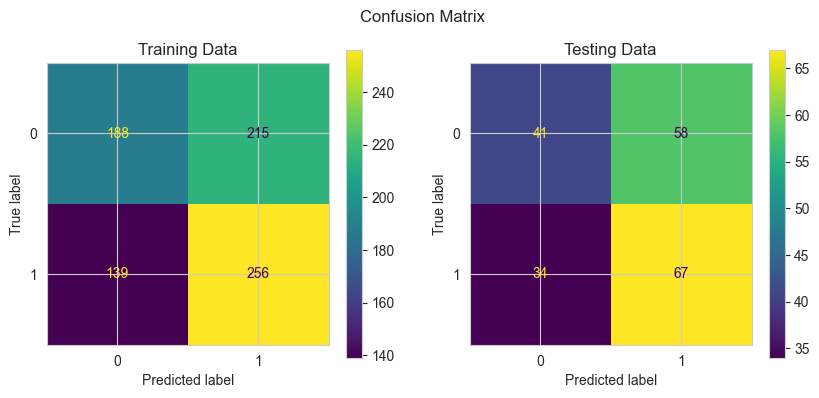

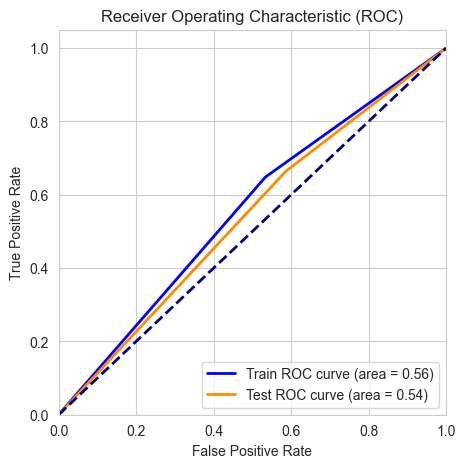

In [100]:
printInformation(X_train, y_train, X_test, y_test, model)

## Summary

#### Logistic Regression
The model achieved for testing data an overall accuracy of **48%**. It has balanced performance between precision and recall for both classes 
and mild to moderate overfitting.

#### Decision Tree
The decision tree model shows an overall test accuracy of **52%**. It displays a balanced precision but varies in recall rates between the two classes, indicating a preference in correctly predicting class 1 over class 0. The model demonstrates a significant overfitting.

#### Random Forest
The model demonstrates a test accuracy of **57%**, showing balanced precision between the two classes and a slightly better ability to correctly predict class 1 over class 0. The model exhibits a significant disparity between training and test performance.

#### Gradient Boosting
The gradient boosting shows an accuracy of **48%** on the test data. It shows nearly balanced precision, recall between the two classes but with a significant drop in performance when compared to the training data.


#### K-Nearest Neighbors 

##### All features
The model achieved for testing data an overall accuracy of ***52%***. The model shows balanced precision across both classes on  but displays slight variation in recall rates, indicating a preference in correctly predicting class 1 over class 0. Model with all features exhibits severe overfitting.

##### Selected features
 
The KNl with selected features demonstratesaccuracy of ***51%***. The model better identifies class 0 over class 1, as seen in the recall rates. A reduction in overfitting is observable. 

#### Support Vectors

##### All features
The model achieved for testing data an overall accuracy of ***49%***. Precision and recall scores are nearly balanced between the two classes, with class 1 showing a marginally better recall  compared to class 0. The model demonstrates a well-balanced performance between the training and testing datasets.

##### Selected features
The model shows accuracy on the testing data ***57%*** (higher than on the training). Precision and recall metrics are closely matched across both classes, with class 1 displaying slightly higher recall than class 0.

#### Naive Bayes 
##### All features
The model achieved for testing data an overall accuracy of ***52%***., with nearly equal precision for both classes but differing recall rates, indicating it is more adept at correctly identifying class 1 over class 0. The model demonstrates a mild overfitting.
##### Selected features
The model shows accuracy on the testing data ***57%*** (higher than on the training). The model shows balanced precision across classes, it demonstrates a consistent bias in recall rates, favoring class 1 over class 0.

#### Neural Network
The model demonstrates a **54%** accuracy on test data (similar to training), exhibits balanced precision across classes with a distinct bias in recall, favoring class 1.